# Prophet model

In [3]:
# todo: refactor prophet model

# XGBoost model
Set to 'Prediction' mode, making predictions from a saved model. 

To change to 'train' mode, go to `xgb_model.config.CFG` and change the value of train from `train=False` to `train=True` 

In [4]:
from xgb_model.main import main
from xgb_model.visualisation import (initialize_shap_explainer, prepare_shap_explanations, plot_dependence_plots, plot_shap_summary, plot_waterfall_plot, plot_shap_values, plot_beeswarm_plot, plot_decision_plot, plot_actual_vs_predicted, plot_feature_importance)

Initialise the model, validation set and predictions

In [5]:
model, dval, valy, valX, val_predictions = main()

Validation MAE: 113.22132925984326
Validation MAE: 113.22132925984326


In [6]:
explainer, shap_values = initialize_shap_explainer(model, dval)
explainer, explanation = prepare_shap_explanations(model, valX)  # fix_me

In [7]:
print("Shape of valX before plotting:", valX.shape)

Shape of valX before plotting: (327, 135)


# plot of actual TOTALDEMAND values vs forecast values

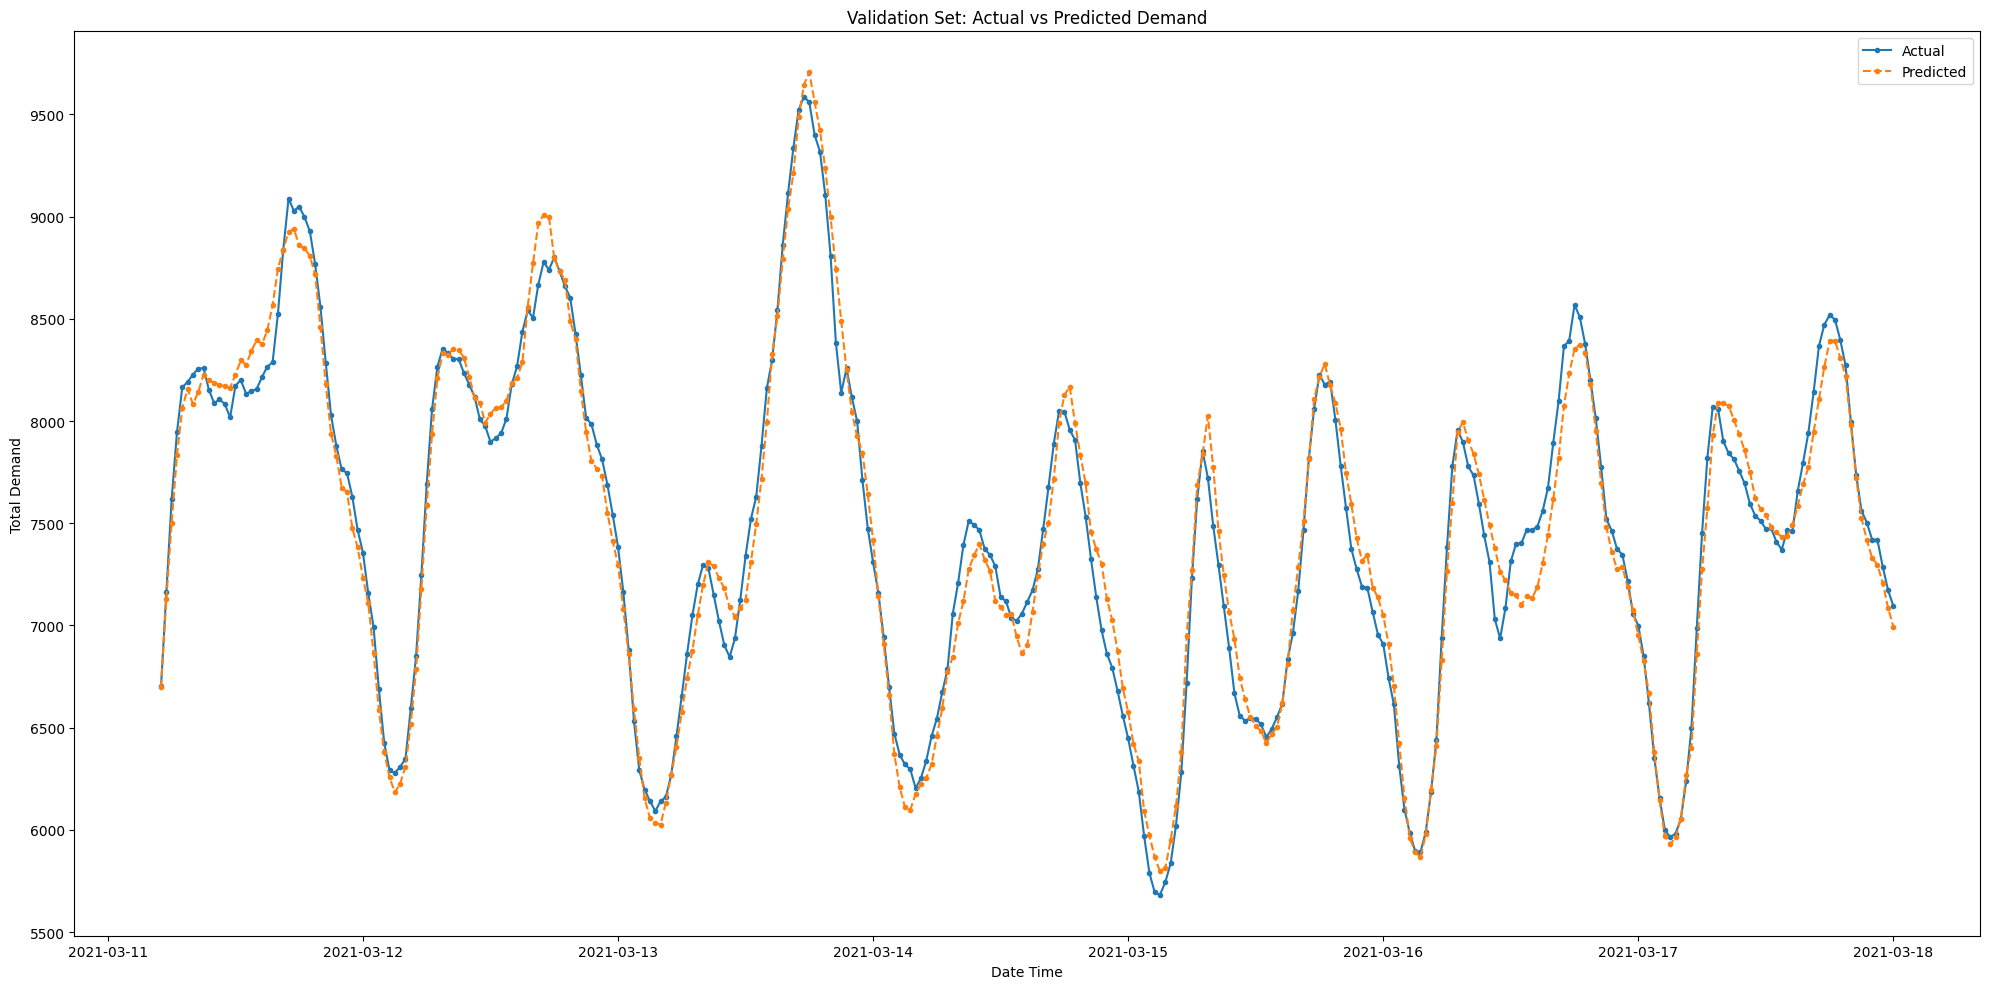

In [13]:
dates = valX.index
plot_actual_vs_predicted(
    dates,
    valy,
    val_predictions,
    'validation_actual_vs_predicted.png'
)

# shap summary plot

In [8]:
plot_shap_summary(
    explainer,
    valX,
    image_name='SHAP summary.png'
)

# plot SHAP values

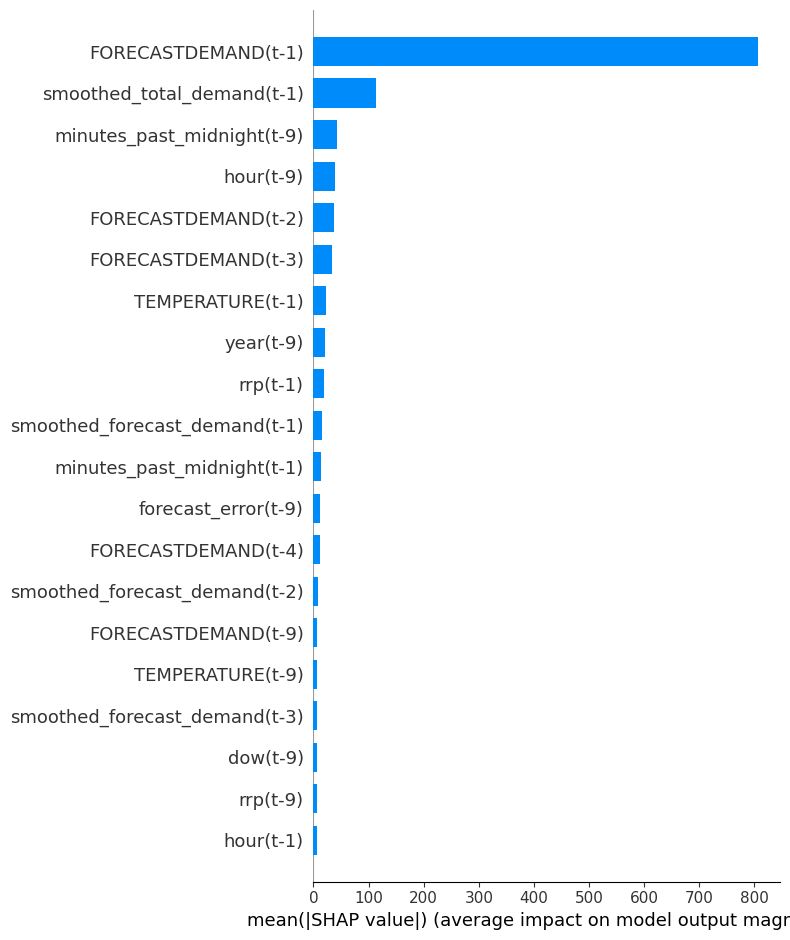

In [19]:
plot_shap_values(
    explainer,
    valX,
    'SHAP Values.png'
)

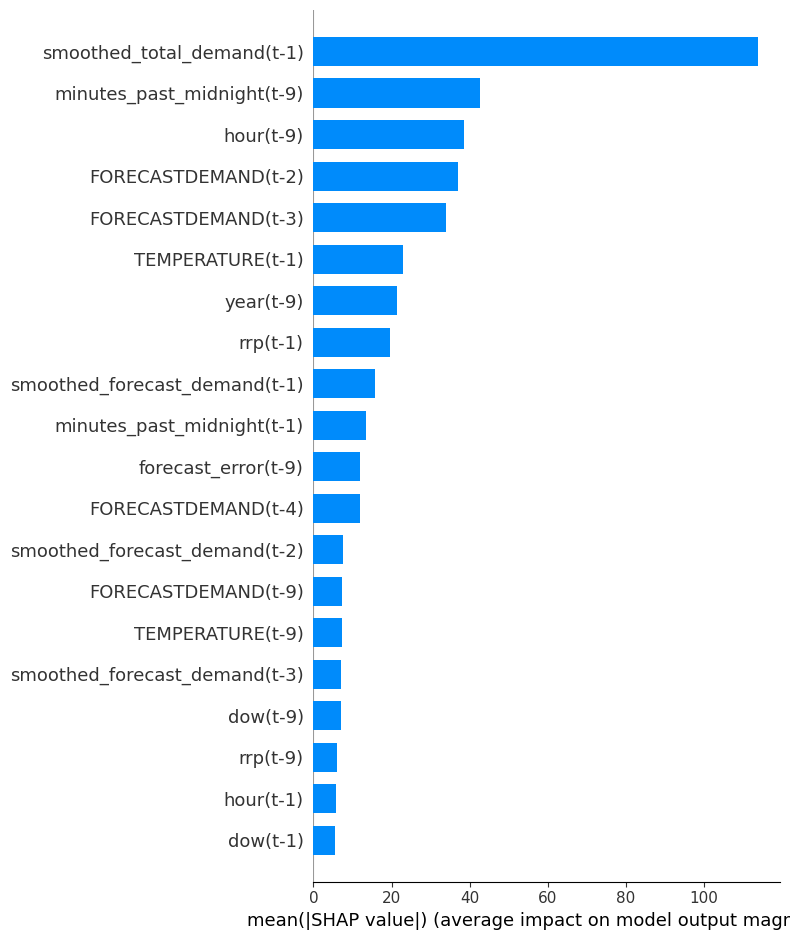

In [12]:
plot_shap_values(
    explainer,
    valX,
    feature_to_exclude='FORECASTDEMAND(t-1)',
    image_name='SHAP values excluding feature 0.png'
)

# Dependence plots for feature 1

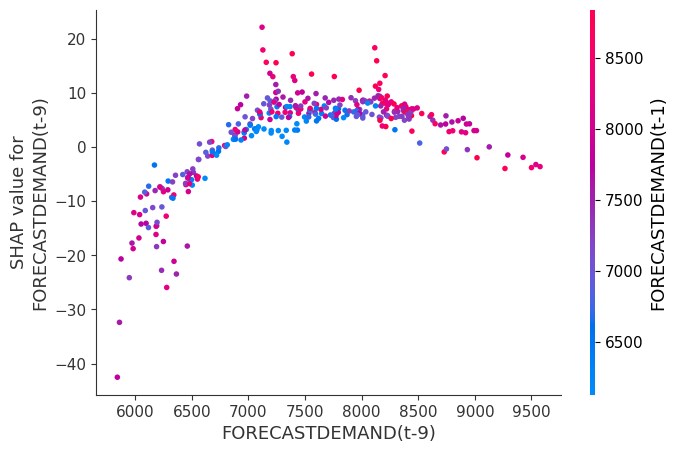

In [22]:
plot_dependence_plots(
    explainer,
    valX,
    feature_index=0,
    image_name="dependence_plot_feature_0.png"
)

# Dependence plots for feature 2

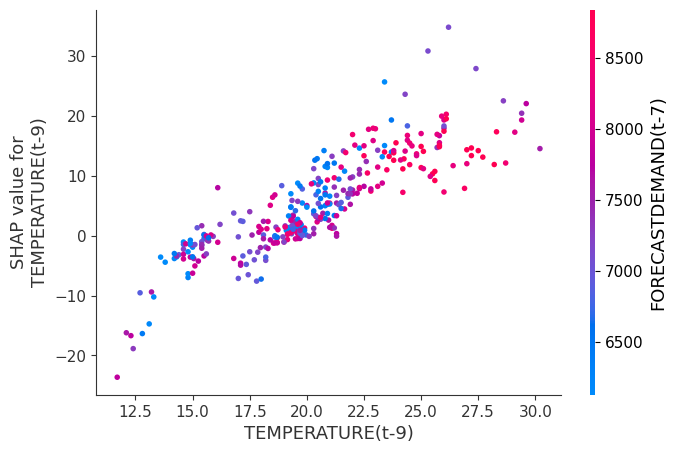

In [23]:
plot_dependence_plots(
    explainer,
    valX,
    feature_index=1,
    image_name='dependence_plot_feature_1.png'
)

# Decision Plot

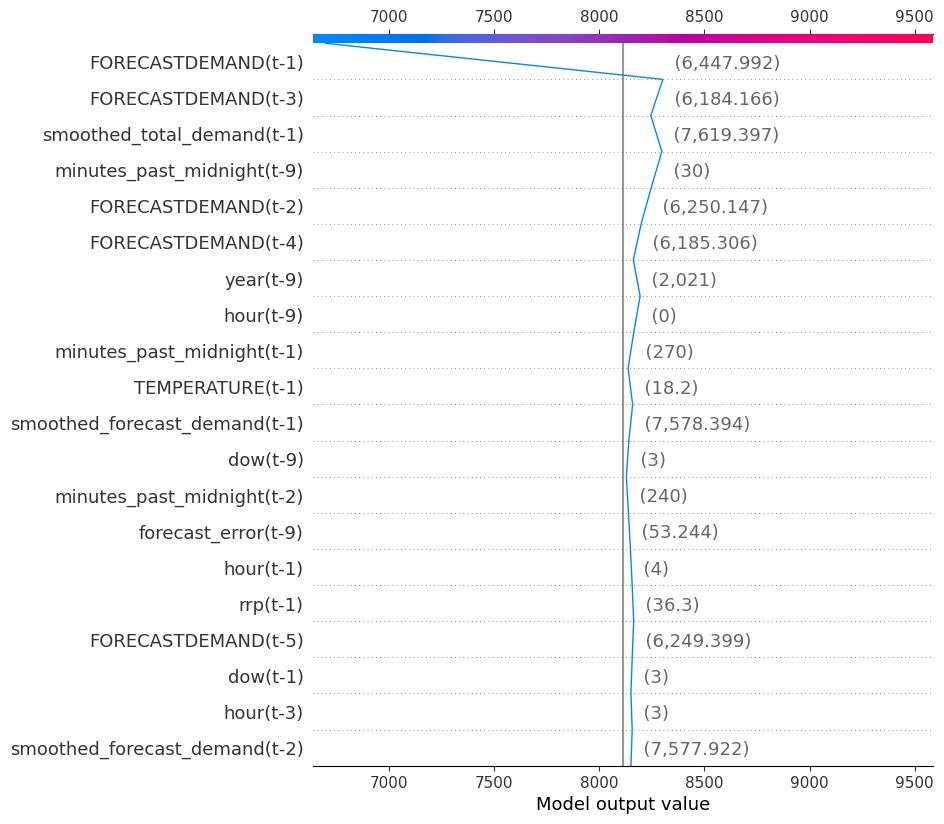

In [11]:
plot_decision_plot(
    explainer,
    valX,
    shap_values,
    instance_index=0,
    image_name='decision plot.png'
)

# Waterfall Plot

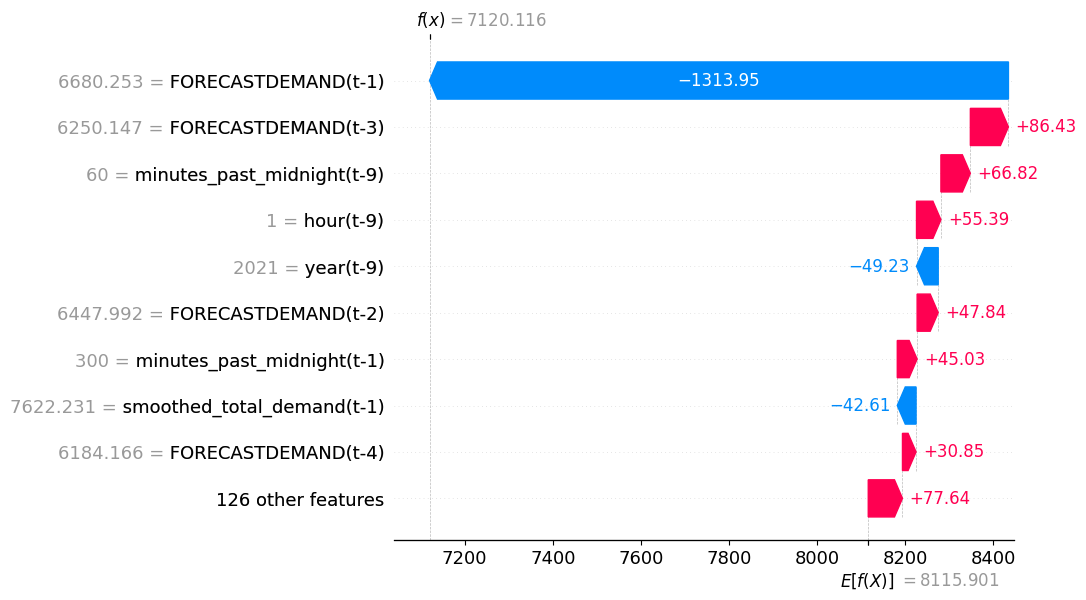

In [21]:
plot_waterfall_plot(
    explanation[1], 
    image_name='Waterfall Plot.png'
)

# Bee Swarm Plot

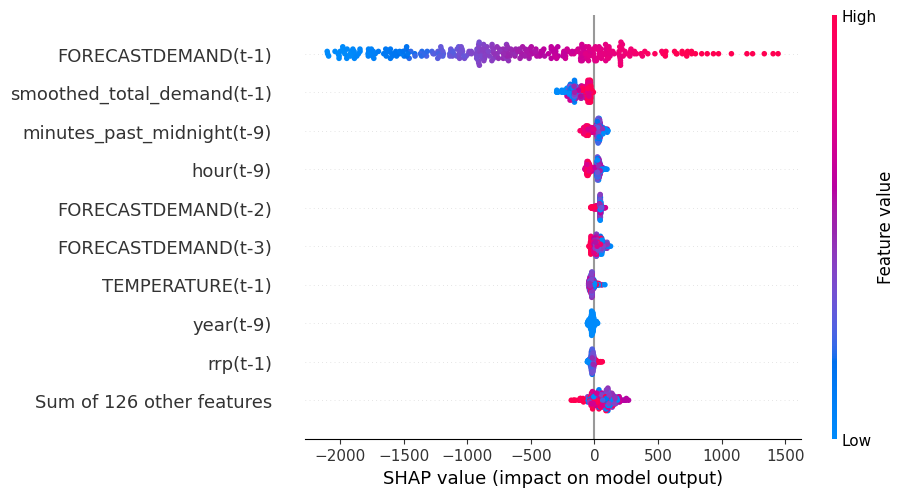

In [15]:
plot_beeswarm_plot(
    explanation,
    image_name='Bee Swarm Plot.png'
)

In [16]:
plot_feature_importance(
    model,
    'Feature Importance.png'
)  # fix_me:

# LSTM Model

In [18]:
# todo: refactor LSTM model